In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
test_df = pd.read_csv('../data/classification/data.simple.test.100.csv')
train_df = pd.read_csv('../data/classification/data.simple.train.100.csv')
train_df['cls'] = train_df['cls'] - 1.0
test_df['cls'] = test_df['cls'] - 1.0


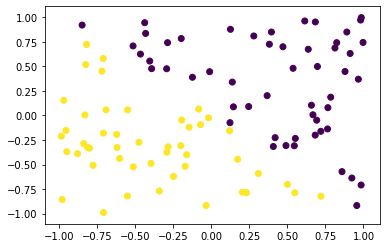

In [4]:
plt.scatter(train_df['x'], train_df['y'], c=train_df['cls'])
plt.show()

In [30]:
import os
sys.path.append('..')
os.getcwd() 

'/home/ccc/IAD/pw-deep-learning/test'

In [54]:
from src.sigmoid_activation import SigmoidActivation
from src.linear_activation import LinearActivation
from src.network import Network
from src.log_error import LogError

In [33]:
x, y, z = train_df.iloc[1]
z

1.0

In [60]:
input_size = 2
output_size = 1
batch_size = 5
eps_decimal = 4
seed = 1

layers = [(10, LinearActivation(), True),
              (output_size, SigmoidActivation(), True)]
network = Network(input_size, layers, LogError(), seed)

for i in range(100):
    avg_loss = 0
    for _, row in train_df.iterrows():
        
        x0, x1, y = row
        X = np.array([[x0, x1]])
        Y = np.array([[y]])

        loss = network.fit(X, Y, 0.01, 1)
        avg_loss += loss
    print(avg_loss/len(train_df))



0.8504257233199485
0.7474352185314104
0.6837721115531918
0.6306158209638754
0.5772871740408572
0.5211799398741556
0.46445893969208873
0.4110522727388954
0.36395956007643504
0.3242628643110224
0.29160320677980783
0.2649757533899044
0.24325014723322705
0.2254016103862051
0.21058179739479208
0.19812030290815097
0.18750092446918984
0.178331764281748
0.1703170206172151
0.16323328635543677
0.15691086733233237
0.15121963354583917
0.14605857436248568
0.14134820707205684
0.1370251018371609
0.1330379383147784
0.12934465424321462
0.12591036668923253
0.12270583931188092
0.1197063369951077
0.1168907575508742
0.114240963872136
0.11174126308226956
0.10937799507267305
0.10713920365709306
0.10501437101919121
0.10299420129511157
0.10107044275889183
0.09923574066084444
0.09748351463647083
0.095807855975044
0.09420344105944459
0.09266545806157725
0.09118954456897507
0.08977173427563961
0.08840841122747933
0.08709627039421454
0.08583228356306495
0.08461366972810934
0.08343786929277915
0.08230252151903644
0

In [66]:
X

array([[-0.43223462,  0.83533097]])

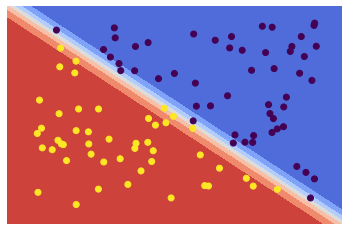

In [113]:
# X - some data in 2dimensional np.array
h = .02
x_min, x_max = -1.2, 1.2
y_min, y_max = -1.2, 1.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.zeros(xx.ravel().shape)
for i, (x, y) in enumerate(zip(xx.ravel(), yy.ravel())):
    z = network.predict(np.array([[x, y]]))
    #Z[i] = 0 if z < 0.5 else 1
    Z[i] = z

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
plt.axis('off')
plt.scatter(train_df['x'], train_df['y'], c=train_df['cls'], cmap=plt.cm.viridis)